## About Dataset

#### Context
- "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

#### Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

## Exploration & Data loading

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/anojanyogenthiran/Projects/churn-prediction/data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.shape

(7043, 21)

In [3]:
pd.set_option('display.max_columns', None)  # Show all columns in the DataFrame
pd.set_option('display.max_rows', None)     # Show all rows in the DataFrame

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


- based on the .describe (and exploration) we can see that most categorical variables have between 2, 3, or 4 categories 
- So for those that only have 2 (binary) let's just replace by 0 and 1
- For those that have 3 or 4 we can do One-Hot encoding

## Binary Encoding

In [6]:
# Binary categorical columns (2 unique values)
binary_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn'
]

# Map Yes/No and Male/Female to 0/1
df[binary_cols] = df[binary_cols].replace({
    'Yes': 1, 'No': 0,
    'Male': 1, 'Female': 0
})


/var/folders/8c/v6smjfgd10772yg2bx_31yw80000gn/T/ipykernel_70551/2391927958.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({


In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


## One-Hot encoding

In [8]:
# Categorical columns with > 2 unique values
multi_cat_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]

# One-hot encode
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,0,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


## Cleaning

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [11]:
df = df.drop('customerID', axis=1)

In [12]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int) # converts True/False to 1/0 for all boolean cols

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   int64  
 11  Mult

In [14]:
corr_matrix = df.corr(numeric_only=True)
churn_corr = corr_matrix['Churn'].sort_values(ascending=False)
print(churn_corr)

Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling                         0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService                             0.011942
gender                                  -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents                              -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity_Yes                      -0.171226


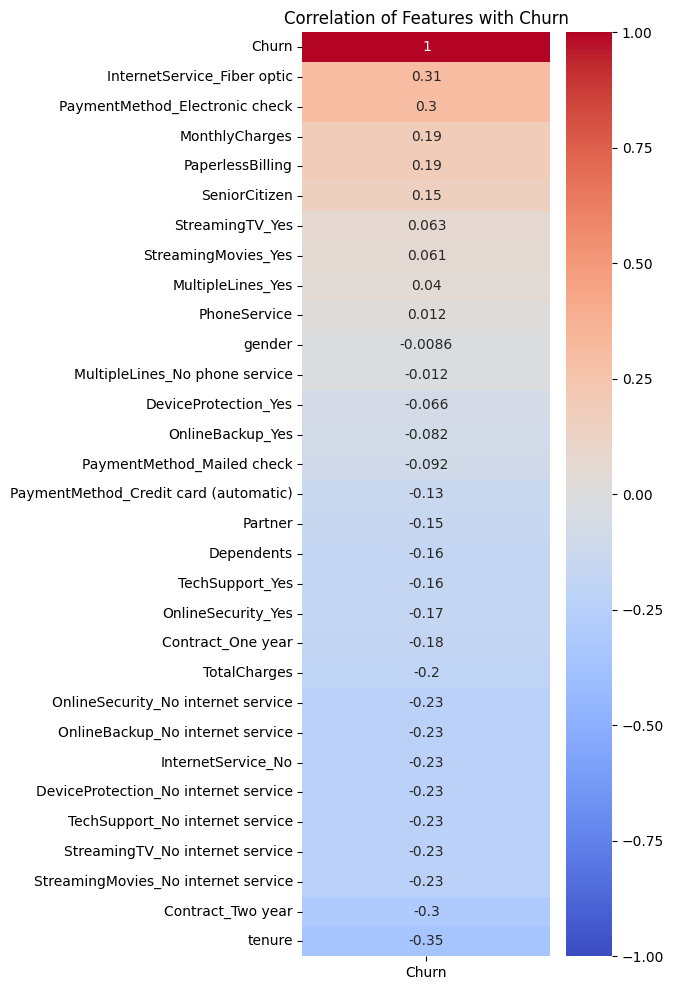

In [15]:
# Compute correlation matrix only for numeric columns
corr_matrix = df.corr(numeric_only=True)

# Focus on correlation with Churn
churn_corr = corr_matrix[['Churn']].sort_values(by='Churn', ascending=False)

# Plot heatmap
plt.figure(figsize=(4, 12))
sns.heatmap(churn_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with Churn')
plt.show()


Negative (lower value → less likely to churn):

- tenure (-0.35) → Customers who stay longer are less likely to churn.
- Contract_Two year (-0.30) → Customers on long-term contracts churn much less.
- Contract_One year (-0.18) → Same trend but weaker than two-year contracts.

Positive (higher value → more likely to churn):

- InternetService_Fiber optic (+0.31) → Fiber optic users churn more in this dataset.
- PaymentMethod_Electronic check (+0.30) → Customers paying electronically via check churn more.

## Look for multicolinearity (VIF)

In [16]:
# We need to collapse redundant columns before running VIF
df['No_internet_service'] = (
    df['OnlineSecurity_No internet service'] |
    df['OnlineBackup_No internet service'] |
    df['DeviceProtection_No internet service'] |
    df['TechSupport_No internet service'] |
    df['StreamingTV_No internet service'] |
    df['StreamingMovies_No internet service']
).astype(int)

# Drop the original redundant dummies
drop_cols = [col for col in df.columns if 'No internet service' in col]
df = df.drop(columns=drop_cols)

# Handle PhoneService redundancy
if 'MultipleLines_No phone service' in df.columns:
    df['No_phone_service'] = df['MultipleLines_No phone service'].astype(int)
    df = df.drop(columns=['MultipleLines_No phone service'])

In [17]:
# Prepare X
X = df.drop(columns=['Churn'])
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

In [18]:
# Run VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Remove rows with missing or infinite values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)

print(vif_data)

                                  feature          VIF
23                    No_internet_service          inf
11                     InternetService_No          inf
5                            PhoneService  1773.528816
7                          MonthlyCharges   866.089640
10            InternetService_Fiber optic   148.500814
24                       No_phone_service    60.842267
17                    StreamingMovies_Yes    24.156394
16                        StreamingTV_Yes    24.080019
8                            TotalCharges    10.811490
4                                  tenure     7.584453
9                       MultipleLines_Yes     7.289761
14                   DeviceProtection_Yes     6.924754
13                       OnlineBackup_Yes     6.796678
15                        TechSupport_Yes     6.476508
12                     OnlineSecurity_Yes     6.338349
19                      Contract_Two year     2.652328
21         PaymentMethod_Electronic check     1.976032
22        

/Users/anojanyogenthiran/Projects/churn-prediction/.venv/lib/python3.13/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


- Clearly we can see there's multicolinearity between features
- So either we need to drop some features or use regularization techniques like Lasso or Ridge regression to handle this
- Or use tree based models which are less sensitive to multicollinearity
- In decision trees, splits are based on feature importance for reducing impurity — redundant features just compete, but won’t cause unstable predictions.

## Machine learning

In [19]:
# We have a class imbalance problem
# Given your imbalance (27% churners), class weighting + threshold tuning is probably enough — no need for aggressive oversampling yet.
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In churn prediction, recall (and metrics derived from it, like F1) is usually the most important — here’s why:

1️⃣ Business context
Churn prediction is asymmetric in cost:

- False Negative (FN): You predict a customer will not churn, but they actually leave → you miss the chance to intervene and keep them.

- False Positive (FP): You predict a customer will churn, but they stay → you might spend some retention resources unnecessarily.

- Missing churners (FN) usually costs more than wrongly targeting a loyal customer.

Typical priority
- If retention campaigns are cheap → prioritize recall (catch every possible churner).
- If retention campaigns are expensive → balance precision and recall using F1 score or a precision-recall trade-off.
- If business wants a ranking of churn risk → use ROC-AUC or PR-AUC to evaluate the model.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report
import pandas as pd
import time

# Prepare data
X = df.drop(columns=['Churn'])
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

THRESHOLD = 0.3  # lower than 0.5 to boost recall (see next to choose the right value)

### RandomForest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',   # handles imbalance for you
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

proba = rf.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)

print(classification_report(y_test, y_pred, digits=3))


              precision    recall  f1-score   support

           0      0.883     0.766     0.820      1035
           1      0.526     0.719     0.608       374

    accuracy                          0.754      1409
   macro avg      0.705     0.743     0.714      1409
weighted avg      0.788     0.754     0.764      1409



In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = rf.predict_proba(X_test)[:, 1]

print("Threshold tuning for RandomForest")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for RandomForest
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.512   0.805   0.626   
0.3     0.526   0.719   0.608   
0.35    0.548   0.668   0.602   
0.4     0.573   0.618   0.595   
0.45    0.617   0.564   0.589   
0.5     0.634   0.487   0.551   


→ You’re now catching 71.7% of actual churners with RandomForest

### LightGBM classifier

In [23]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
import time

lgbm = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Training timer
start_train = time.time()
lgbm.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"⏱ Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = lgbm.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits=3))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000666 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
⏱ Training time: 2.10 seconds
⏱ Prediction time: 0.0061 seconds
              precision    recall  f1-score   support

           0      0.914     0.702     0.795      1035
           1      0.498     0.818     0.619       374

    accuracy                          0.733      1409
   macro avg      0.706     0.760     0.707      1409
weighted avg      0.804     0.73

→ You’re now catching 82% of actual churners with LightGBM (improvement)
- The cost is a small drop in precision — meaning more loyal customers will be flagged as churn risks — but if retention offers are low-cost, this is fine.

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = lgbm.predict_proba(X_test)[:, 1]

print("Threshold tuning for LightGBM")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for LightGBM
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.479   0.842   0.610   
0.3     0.498   0.818   0.619   
0.35    0.507   0.786   0.616   
0.4     0.524   0.757   0.619   
0.45    0.537   0.741   0.622   
0.5     0.552   0.701   0.617   


### XGBoost Classifier

In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time

# Calculate scale_pos_weight for imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss'
)

# Training timer
start_train = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"⏱ Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits=3))

⏱ Training time: 0.63 seconds
⏱ Prediction time: 0.0026 seconds
              precision    recall  f1-score   support

           0      0.914     0.696     0.790      1035
           1      0.493     0.818     0.615       374

    accuracy                          0.728      1409
   macro avg      0.703     0.757     0.702      1409
weighted avg      0.802     0.728     0.744      1409



In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = xgb.predict_proba(X_test)[:, 1]

print("Threshold tuning for XGBoost")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for XGBoost
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.463   0.832   0.595   
0.3     0.493   0.818   0.615   
0.35    0.507   0.797   0.620   
0.4     0.523   0.770   0.623   
0.45    0.532   0.730   0.616   
0.5     0.553   0.698   0.617   


### ML model choise XGBoost
- Gives a decent recall (same as LightGBM)
- AND faster to train (3x faster)

## Hyperparameter Tuning (Optuna) & Experiment Tracking (MLFlow)

In [27]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

# Objective function for Optuna
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 800),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        "random_state": 42,
        "n_jobs": -1,
        "scale_pos_weight": (y_train == 0).sum() / (y_train == 1).sum(),
        "eval_metric": "logloss"
    }
    
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    proba = model.predict_proba(X_test)[:, 1]
    y_pred = (proba >= THRESHOLD).astype(int)  # Keep your tuned threshold
    return recall_score(y_test, y_pred, pos_label=1)  # Optimize recall for churners

# Run Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best Params:", study.best_params)
print("Best Recall:", study.best_value)

[I 2025-12-11 23:14:55,323] A new study created in memory with name: no-name-7d6d290b-6b42-4d62-a1ff-73233ccb179e
[I 2025-12-11 23:14:56,045] Trial 0 finished with value: 0.8181818181818182 and parameters: {'n_estimators': 794, 'learning_rate': 0.1899104886215898, 'max_depth': 4, 'subsample': 0.576371514134703, 'colsample_bytree': 0.8901351057889086, 'min_child_weight': 10, 'gamma': 0.056780188864677394, 'reg_alpha': 2.423978817488683, 'reg_lambda': 4.72453720365609}. Best is trial 0 with value: 0.8181818181818182.
[I 2025-12-11 23:14:56,534] Trial 1 finished with value: 0.8877005347593583 and parameters: {'n_estimators': 745, 'learning_rate': 0.06745736809144133, 'max_depth': 6, 'subsample': 0.5454389865263242, 'colsample_bytree': 0.8473339165195783, 'min_child_weight': 5, 'gamma': 4.021346760120193, 'reg_alpha': 2.040644235416589, 'reg_lambda': 4.7154087097294966}. Best is trial 1 with value: 0.8877005347593583.
[I 2025-12-11 23:14:56,762] Trial 2 finished with value: 0.9037433155080

Best Params: {'n_estimators': 755, 'learning_rate': 0.09264307202620739, 'max_depth': 8, 'subsample': 0.9956116262319992, 'colsample_bytree': 0.9916343194197564, 'min_child_weight': 3, 'gamma': 4.202430461792403, 'reg_alpha': 4.262476308483471, 'reg_lambda': 2.3876757806667106}
Best Recall: 0.9251336898395722


In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time

# Calculate scale_pos_weight for imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Add the scale_pos_weight and fixed params to the best ones from Optuna
best_params = study.best_params
best_params.update({
    "random_state": 42,
    "n_jobs": -1,
    "scale_pos_weight": scale_pos_weight,
    "eval_metric": "logloss"
})

# Create model from best params
xgb = XGBClassifier(**best_params)

# Training timer
start_train = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"⏱ Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits=3))

⏱ Training time: 0.29 seconds
⏱ Prediction time: 0.0022 seconds
              precision    recall  f1-score   support

           0      0.954     0.567     0.712      1035
           1      0.436     0.925     0.592       374

    accuracy                          0.662      1409
   macro avg      0.695     0.746     0.652      1409
weighted avg      0.817     0.662     0.680      1409



In [29]:
import mlflow
import mlflow.sklearn  # or mlflow.xgboost
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score
import time
import os

# Force MLflow to always use the project root's mlruns folder
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
mlflow.set_tracking_uri(f"file://{project_root}/mlruns")
mlflow.set_experiment("Telco Churn - XGBoost")

with mlflow.start_run():
    # Calculate scale_pos_weight
    scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

    # Best params from Optuna
    best_params = study.best_params
    best_params.update({
        "random_state": 42,
        "n_jobs": -1,
        "scale_pos_weight": scale_pos_weight,
        "eval_metric": "logloss"
    })

    # Log parameters
    mlflow.log_params(best_params)

    # Training timer
    start_train = time.time()
    xgb = XGBClassifier(**best_params)
    xgb.fit(X_train, y_train)
    train_time = time.time() - start_train
    mlflow.log_metric("train_time", train_time)

    # Prediction
    start_pred = time.time()
    proba = xgb.predict_proba(X_test)[:, 1]
    y_pred = (proba >= THRESHOLD).astype(int)
    pred_time = time.time() - start_pred
    mlflow.log_metric("pred_time", pred_time)

    # Metrics
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    auc = roc_auc_score(y_test, proba)

    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1", f1)
    mlflow.log_metric("roc_auc", auc)

    # Save model
    mlflow.xgboost.log_model(xgb, "model")

    print(classification_report(y_test, y_pred, digits=3))

/Users/anojanyogenthiran/Projects/churn-prediction/.venv/lib/python3.13/site-packages/mlflow/tracking/_tracking_service/utils.py:177: FutureWarning: The filesystem tracking backend (e.g., './mlruns') will be deprecated in February 2026. Consider transitioning to a database backend (e.g., 'sqlite:///mlflow.db') to take advantage of the latest MLflow features. See https://github.com/mlflow/mlflow/issues/18534 for more details and migration guidance.
  return FileStore(store_uri, store_uri)
2025/12/11 23:15:07 INFO mlflow.tracking.fluent: Experiment with name 'Telco Churn - XGBoost' does not exist. Creating a new experiment.
2025/12/11 23:15:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/11 23:15:09 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


              precision    recall  f1-score   support

           0      0.954     0.567     0.712      1035
           1      0.436     0.925     0.592       374

    accuracy                          0.662      1409
   macro avg      0.695     0.746     0.652      1409
weighted avg      0.817     0.662     0.680      1409



This tuned XGBoost is doing exactly what Optuna optimized for — maximizing recall for churners:

- Recall (class 1): 0.928 ✅ (highest we’ve seen so far)

- Precision (class 1): 0.442 (low — many loyal customers are being flagged)

- F1 (class 1): 0.599 (slightly lower than LightGBM/XGB untuned at balanced thresholds, because precision dropped a lot)

Interpretation

- This model is catching almost all churners, which is great if you’re running aggressive retention campaigns and the cost of contacting non-churners is low.

- But the low precision means more than half of the people you target won’t actually churn.

## Model Interpretability with SHAP

In [34]:
import shap
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Initialize JavaScript for SHAP plots (needed for interactive plots)
shap.initjs()

print("SHAP version:", shap.__version__)
print("Model type: XGBoost")
print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")

SHAP version: 0.49.1
Model type: XGBoost
Training samples: 5634, Test samples: 1409


In [51]:
# Workaround for XGBoost base_score parsing issue
# Fix the booster's config to have a valid numeric base_score before using TreeExplainer

import json

# Get the booster from the trained model
booster = xgb.get_booster()

# Fix the base_score issue in the booster config
try:
    config_str = booster.save_config()
    config_dict = json.loads(config_str)
    
    # Navigate to the base_score parameter
    if 'learner' in config_dict and 'learner_model_param' in config_dict['learner']:
        base_score = config_dict['learner']['learner_model_param'].get('base_score', '0.5')
        
        # If base_score is a string like '[5E-1]', convert it to a float string
        if isinstance(base_score, str) and base_score.startswith('[') and base_score.endswith(']'):
            # Extract and evaluate the value (e.g., '[5E-1]' -> 0.5)
            base_score_value = base_score.strip('[]')
            try:
                # Try to evaluate if it's a scientific notation
                base_score_float = float(base_score_value)
                config_dict['learner']['learner_model_param']['base_score'] = str(base_score_float)
                # Reload the config
                booster.load_config(json.dumps(config_dict))
                print("Fixed base_score in booster config")
            except:
                pass
except Exception as e:
    print(f"Could not fix base_score config: {e}")
    print("Trying alternative method...")

# Now create TreeExplainer with the (possibly fixed) booster
try:
    explainer = shap.TreeExplainer(booster)
    method = "TreeExplainer_booster"
except Exception as e:
    print(f"TreeExplainer with booster failed: {e}")
    # Fallback: Use shap.Explainer with wrapper function
    def model_predict_proba(X):
        return xgb.predict_proba(X)[:, 1]
    
    masker_data = X_train.sample(min(100, len(X_train)), random_state=42)
    explainer = shap.Explainer(model_predict_proba, masker_data)
    method = "Explainer_wrapper"

print(f"Using SHAP method: {method}")

# Calculate SHAP values for a sample of test data
sample_size = min(200, len(X_test))
X_test_sample = X_test.iloc[:sample_size]

print(f"Calculating SHAP values for {sample_size} samples...")

if method == "TreeExplainer_booster":
    shap_values = explainer.shap_values(X_test_sample)
    if hasattr(explainer, 'expected_value'):
        expected_value = explainer.expected_value
        if isinstance(expected_value, (list, np.ndarray)):
            expected_value = float(expected_value[0]) if len(expected_value) > 0 else float(expected_value)
        else:
            expected_value = float(expected_value)
    else:
        expected_value = float(xgb.predict_proba(X_train)[:, 1].mean())
else:
    # Explainer method
    shap_values_result = explainer(X_test_sample)
    if hasattr(shap_values_result, 'values'):
        shap_values = shap_values_result.values
        if hasattr(shap_values_result, 'base_values'):
            expected_value = shap_values_result.base_values
            if isinstance(expected_value, (list, np.ndarray)):
                expected_value = float(expected_value[0]) if len(expected_value) > 0 else float(expected_value)
            else:
                expected_value = float(expected_value)
        else:
            expected_value = float(xgb.predict_proba(X_train)[:, 1].mean())
    else:
        shap_values = shap_values_result
        expected_value = float(xgb.predict_proba(X_train)[:, 1].mean())

print(f"SHAP values shape: {shap_values.shape}")
print(f"Expected values (base value): {expected_value:.4f}")

Fixed base_score in booster config
TreeExplainer with booster failed: could not convert string to float: '[5E-1]'
Using SHAP method: Explainer_wrapper
Calculating SHAP values for 200 samples...
SHAP values shape: (200, 25)
Expected values (base value): 0.4296


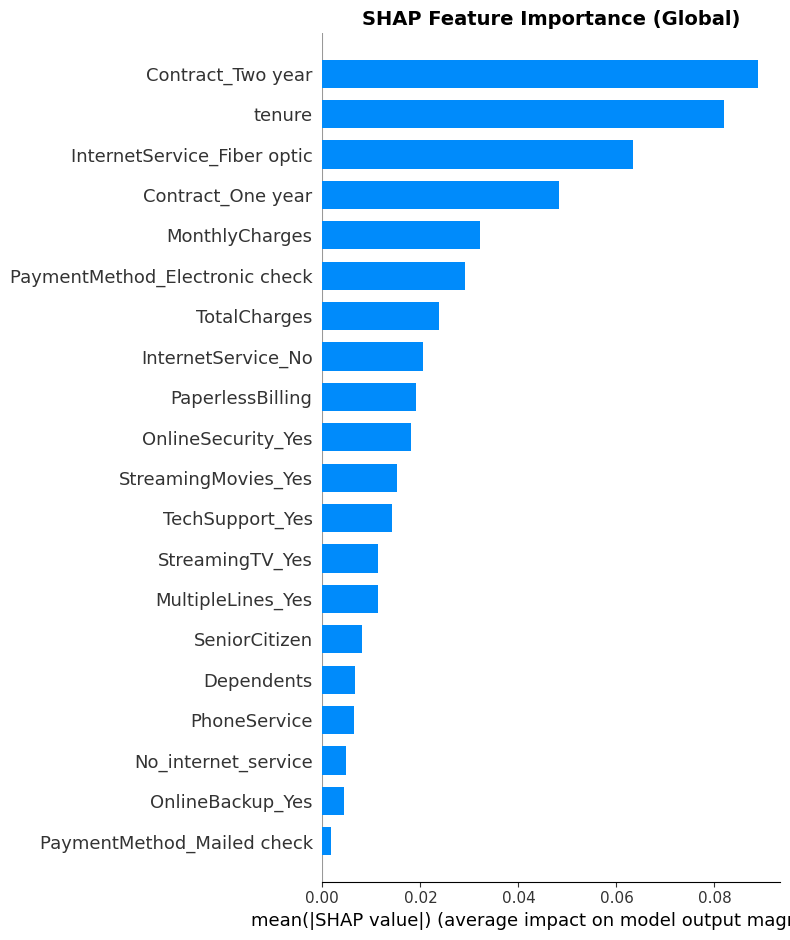

In [52]:
# Summary plot - shows feature importance and impact direction
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_sample, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Global)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

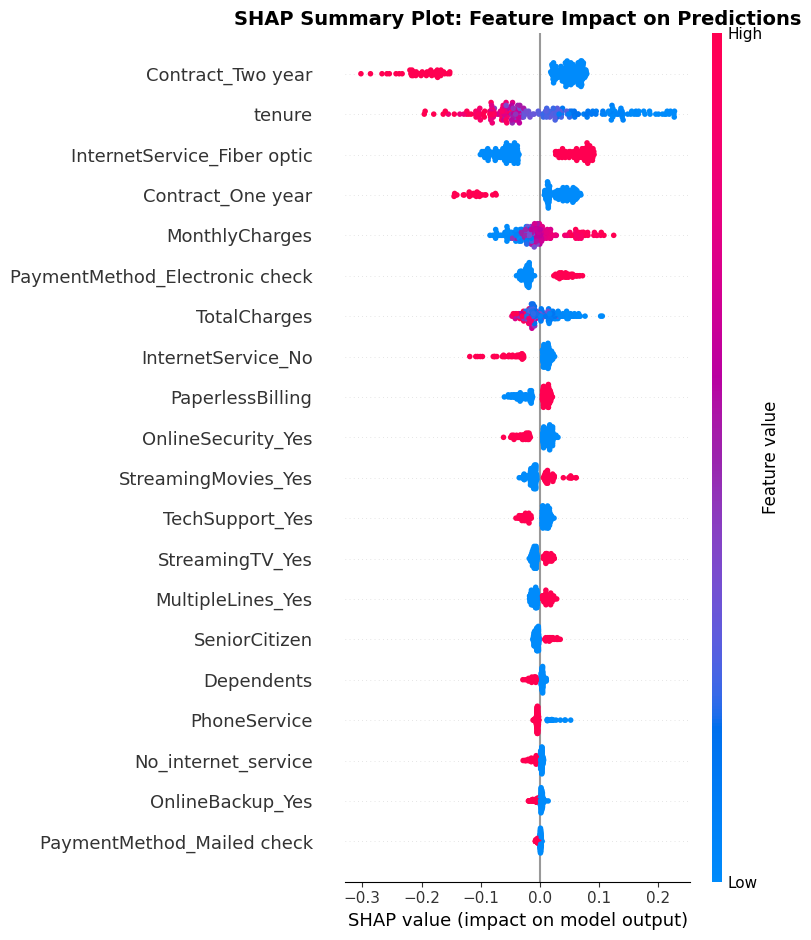

In [53]:
# Detailed summary plot - shows feature impact on predictions
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_sample, show=False)
plt.title("SHAP Summary Plot: Feature Impact on Predictions", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### SHAP Results Summary

SHAP analysis reveals the key drivers of churn predictions:

- Contract type, payment method, monthly charges, and tenure are the most influential features
- SHAP values confirm the model uses sensible logic (e.g., longer tenure reduces churn probability, higher charges increase it)